# Email Spam Detection

## Flow Chart
### 1. Load the dataset
### 2. Data Preprocessing
#### Data Cleaning
#### Tokenization
#### Lemmatization
### 3. Spliting the Data into Train and Test
### 4. Feature Extraction 
#### TFIDF
### 5. Model Building
### 6. Model Evaluation

In [74]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import classification_report,confusion_matrix

from bs4 import BeautifulSoup
import re

import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [75]:
data = pd.read_csv('spam.csv',encoding="latin-1")
data.head()

,label,emails_messages,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [76]:
data = data[['label', 'emails_messages']]
data.head()

,label,emails_messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Data preprocessing

In [77]:
## let's check nan or null values
data.isnull().sum()

label              0
emails_messages    0
dtype: int64

In [78]:
## check the number of label or categories
data['label'].unique()

array(['ham', 'spam'], dtype=object)

In [79]:
"""
   Replace label:spam mail as 1 label:non spam/ham as 0
"""

data['label'] = data['label'].map({'ham':0, 
                                   'spam':1
                                  })

In [80]:
data.head()

,label,emails_messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [81]:
"""preprocess function takes the one input argument as text data and preprocess the entire text data"""
def preprocess(data):
    
    data = str(data).lower().strip()
    
    # Replace special characters with their string.
    data = data.replace('%', ' percent')
    data = data.replace('$', ' dollar ')
    data = data.replace('₹', ' rupee ')
    data = data.replace('€', ' euro ')
    data = data.replace('@', ' at ')
    data = data.replace('#', '')
    data = data.replace('u.s.', 'usa')
    
    # Decontracting words
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    data_decontracted = []

    for word in data.split():
        if word in contractions:
            word = contractions[word]

        data_decontracted.append(word)

    data = ' '.join(data_decontracted)
    data = data.replace("'ve", " have")
    data = data.replace("n't", " not")
    data = data.replace("'re", " are")
    data = data.replace("'ll", " will")
    
    # Removing HTML tags
    data = BeautifulSoup(data)
    data = data.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    data = re.sub(pattern, ' ', data).strip()

    
    return data

In [82]:
data['emails_messages'] = data['emails_messages'].apply(preprocess)

In [83]:
data.head()

,label,emails_messages
0,0,go until jurong point crazy available only ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i do not think he goes to usf he lives ar...


## Tokenization

In [84]:
tokenization = data['emails_messages'].apply(lambda x : x.split())
tokenization

0       [go, until, jurong, point, crazy, available, o...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, in, 2, a, wkly, comp, to, win, f...
3       [u, dun, say, so, early, hor, u, c, already, t...
4       [nah, i, do, not, think, he, goes, to, usf, he...
                              ...                        
5567    [this, is, the, 2nd, time, we, have, tried, 2,...
5568        [will, ì_, b, going, to, esplanade, fr, home]
5569    [pity, was, in, mood, for, that, so, any, othe...
5570    [the, guy, did, some, bitching, but, i, acted,...
5571                     [rofl, its, true, to, its, name]
Name: emails_messages, Length: 5572, dtype: object

## Lemmatization

In [85]:
from nltk.stem import WordNetLemmatizer
import nltk
#nltk.download('wordnet')
#nltk.download('omw-1.4')
lemmaObj = WordNetLemmatizer()

lemmatization = tokenization.apply(lambda x : [lemmaObj.lemmatize(word) for word in x])
lemmatization

0       [go, until, jurong, point, crazy, available, o...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, in, 2, a, wkly, comp, to, win, f...
3       [u, dun, say, so, early, hor, u, c, already, t...
4       [nah, i, do, not, think, he, go, to, usf, he, ...
                              ...                        
5567    [this, is, the, 2nd, time, we, have, tried, 2,...
5568        [will, ì_, b, going, to, esplanade, fr, home]
5569    [pity, wa, in, mood, for, that, so, any, other...
5570    [the, guy, did, some, bitching, but, i, acted,...
5571                       [rofl, it, true, to, it, name]
Name: emails_messages, Length: 5572, dtype: object

In [86]:
data['clean_messages'] = lemmatization.apply(lambda x: ' '.join(x))

In [87]:
data.head()

,label,emails_messages,clean_messages
0,0,go until jurong point crazy available only ...,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say,u dun say so early hor u c already then say
4,0,nah i do not think he goes to usf he lives ar...,nah i do not think he go to usf he life around...


## Splitting data into train and test

In [88]:
X = data['clean_messages']
y = data['label']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

## Feature Extraction

In [90]:
"""Transform the text into feature vectors that can be used as input to the model"""

tfidf = TfidfVectorizer(min_df=1 ,stop_words='english')
X_train_features = tfidf.fit_transform(X_train) ## train data
X_test_features = tfidf.transform(X_test) ## test data

## Model Training

### 1. KNN (K Nearest Neighbors)

In [34]:
KNN = KNeighborsClassifier(n_jobs=3)
KNN.fit(X_train_features,y_train)

KNeighborsClassifier(n_jobs=3)

In [66]:
knn_prediction = KNN.predict(X_test_features)

### Model Evaluation

In [41]:
print(confusion_matrix(y_test,knn_prediction))
print(classification_report(y_test,knn_prediction,target_names=['Not Spam', 'Spam']))

[[982   0]
 [ 86  47]]
              precision    recall  f1-score   support

    Not Spam       0.92      1.00      0.96       982
        Spam       1.00      0.35      0.52       133

    accuracy                           0.92      1115
   macro avg       0.96      0.68      0.74      1115
weighted avg       0.93      0.92      0.91      1115



### Choosing a optimal K Value

In [53]:
accuracy_rate = []

# Will take some time
for i in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_features,y_train)
    score=knn.score(X_test_features,y_test)
    accuracy_rate.append(score)

Text(0, 0.5, 'Accuracy')

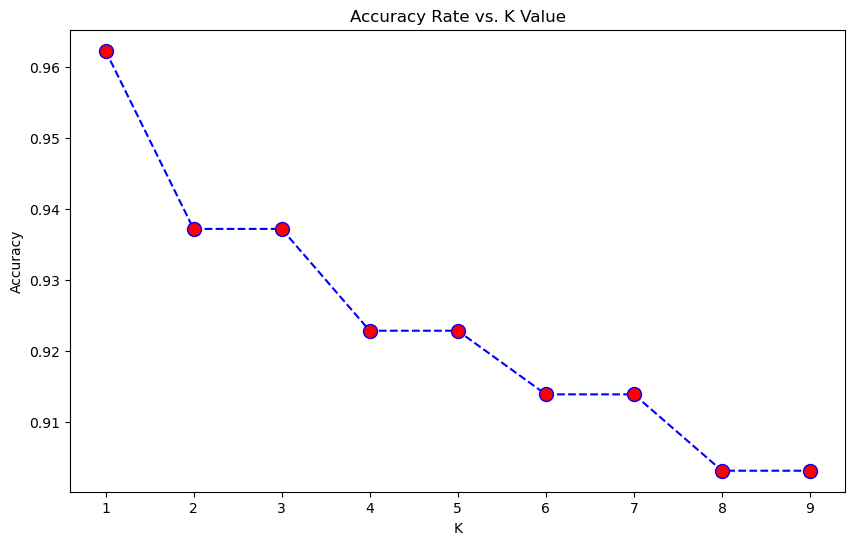

In [57]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

### Optimal K value is 1

### 2. Random Forest Model

In [64]:
## model training
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_features,y_train)

## prediciton
rf_prediction = rf.predict(X_test_features)

## Model Evalution
print(confusion_matrix(y_test,rf_prediction))
print(classification_report(y_test,rf_prediction,target_names=['Not Spam', 'Spam']))


[[981   1]
 [ 25 108]]
              precision    recall  f1-score   support

    Not Spam       0.98      1.00      0.99       982
        Spam       0.99      0.81      0.89       133

    accuracy                           0.98      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.98      0.98      1115



### 3. Naive Bayes Model

In [70]:
## model training
NB = MultinomialNB()
NB.fit(X_train_features,y_train)

## prediciton
NB_prediction = NB.predict(X_test_features)

## Model Evalution
print(confusion_matrix(y_test,NB_prediction))
print(classification_report(y_test,NB_prediction,target_names=['Not Spam', 'Spam']))


[[982   0]
 [ 31 102]]
              precision    recall  f1-score   support

    Not Spam       0.97      1.00      0.98       982
        Spam       1.00      0.77      0.87       133

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115



## Prediction

In [102]:
email_1 = "Buy crypto and get $20 trading fee rebate!"
email_2 = "Congratulations! You've won a $1,000 Walmart gift card. Go to http://bit.ly/123456 to claim now."

## convert text into feature vector
vec1 = tfidf.transform([email_1])
vec2 = tfidf.transform([email_2])

## prediction
email_prediction_1 = rf.predict(vec1)
email_prediction_2 = rf.predict(vec2)

if email_prediction_1[0] == 0:
    print('First Email ---> Not Spam Email')
else:
    print('First Email ---> Spam Email')
    
if email_prediction_2[0] == 0:
    print('Second Email ---> Not Spam Email')
else:
    print('Second Email ---> Spam Email')


First Email ---> Not Spam Email
Second Email ---> Spam Email
